In [1]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

In [2]:
SIZES = [10, 100, 1000, 3000]
ALPHAS = [0.2, 0.5, 1.0, 1.5, 2.0]
MAX_REPEATS = 1000000

(a) Каждое окошко может принять не более двух человек, поэтому время ожидания n-того человека в очереди будет равно n-ой порядковой статистике случайной экспоненциальной выборке(первые n человек у окошек).

In [3]:
def get_sample(alpha, sample_size):
    return np.sort(np.random.exponential(scale=1/alpha, size=sample_size))

def simulate(num_repeats, alpha, sample_size):
    result = np.zeros(sample_size)
    for i in range(num_repeats):
        result += get_sample(alpha, sample_size)
    return result / num_repeats

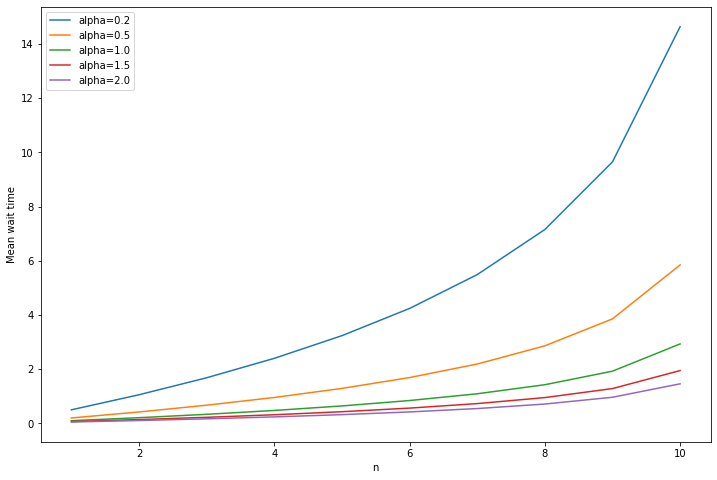

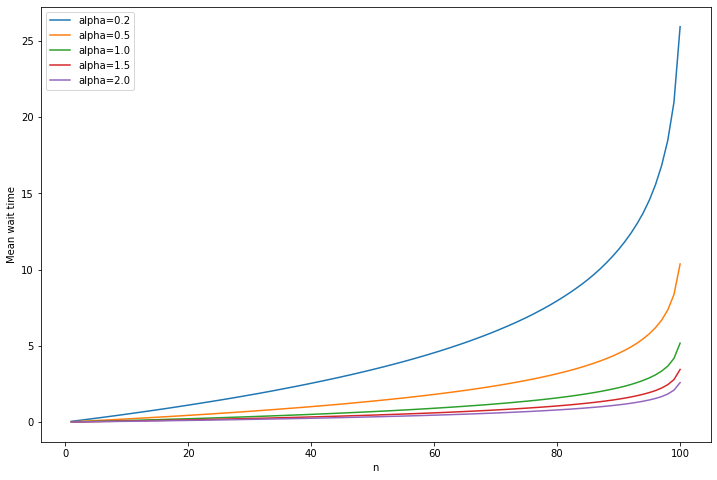

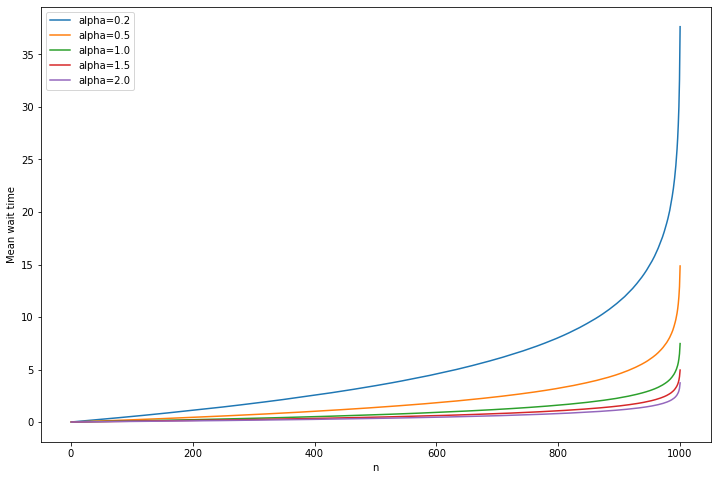

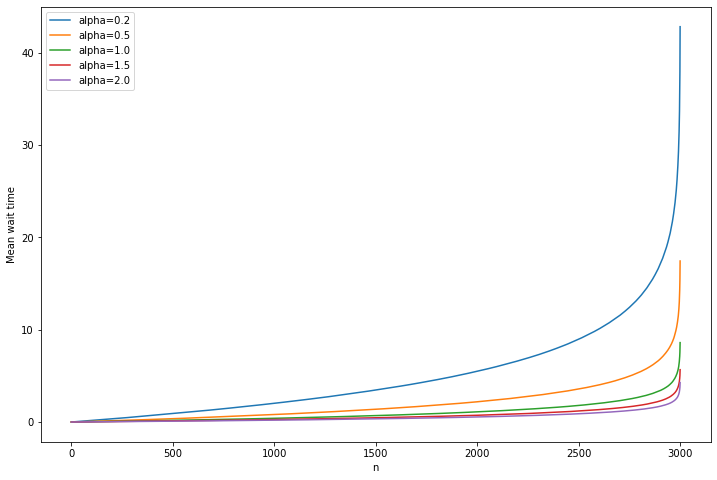

In [4]:
for size in SIZES:
    plt.figure(figsize=(12, 8))
    ns = [n for n in range(1, size+1)]
    for alpha in ALPHAS:
        ys = simulate(MAX_REPEATS // size, alpha, size)
        plt.plot(ns, ys, label='alpha={}'.format(alpha))
    plt.xlabel('n')
    plt.ylabel('Mean wait time')
    plt.legend()
    plt.show()

На практике мы получили, что $X_{(k+1)} - X_{(k)} \sim Exp(\alpha \cdot (n - k))$, матожидание равно $\dfrac{1}{\alpha \cdot (n - k)}$.

Из линейности матожидания можно получить, что $\mathbb{E}X_{(k)} = \mathbb{E}((X_k - X_{(k-1)}) + (X_{(k-1)} - X_{(k-2)}) + \ldots + (X_{(2)} - X_{(1)}) + X_{(1)}) =$
$= \mathbb{E}(X_k - X_{(k-1)}) + \mathbb{E}(X_{(k-1)} - X_{(k-2)}) + \ldots + \mathbb{E}(X_{(2)} - X_{(1)}) + \mathbb{E}X_{(1)} = \sum_{i=0}^{k-1} \dfrac{1}{\alpha \cdot (n - i)}$

Покажем разницу между теоретической оценкой и экспериментом.

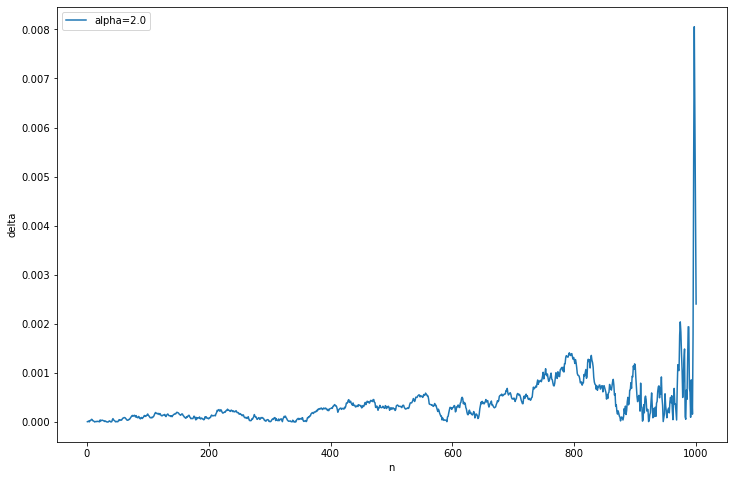

In [5]:
def show_delta(n, alpha):
    plt.figure(figsize=(12, 8))
    ns = [n for n in range(1, n+1)]
    ys = simulate(MAX_REPEATS // n, alpha, n)
    deltas = np.zeros(n)
    current_mean = 0
    for i in range(n):
        current_mean += 1 / (alpha * (n - i))
        deltas[i] = abs(ys[i] - current_mean)
    plt.plot(ns, deltas, label='alpha={}'.format(alpha))
    plt.xlabel('n')
    plt.ylabel('delta')
    plt.legend()
    plt.show()
    
show_delta(1000, 2.0)

(b) Теперь окошки могут принимать несколько человек. Пусть в очереди стоит в 2 раза больше людей, чем окошек. Когда освобождается любое окно, первый человек в очереди направляется туда.

In [6]:
def get_sample_multiple_windows(alpha, sample_size):
    result = []
    heap = list(np.sort(np.random.exponential(1 / alpha, sample_size)))
    heapq.heapify(heap)
    for i in range(sample_size * 2):
        result.append(heapq.heappop(heap))
        rnd = np.random.exponential(scale=1/alpha)
        heapq.heappush(heap, rnd + result[i])
    return result

def simulate_multiple_windows(num_repeats, alpha, sample_size):
    result = np.zeros(sample_size * 2)
    for i in range(num_repeats):
        result += get_sample_multiple_windows(alpha, sample_size)
    return result / num_repeats

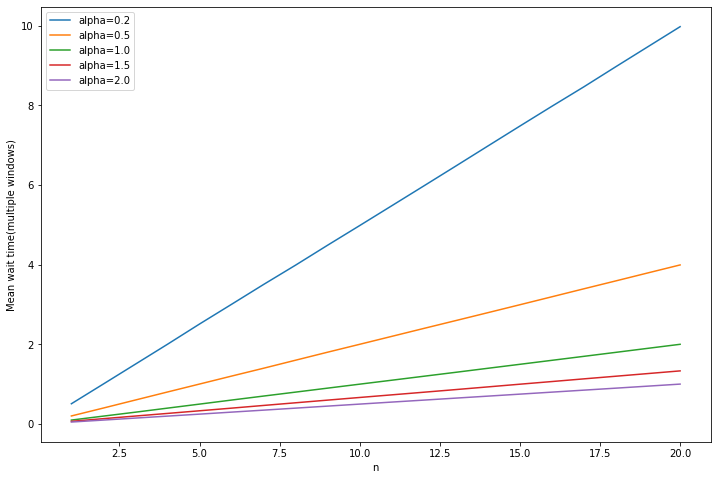

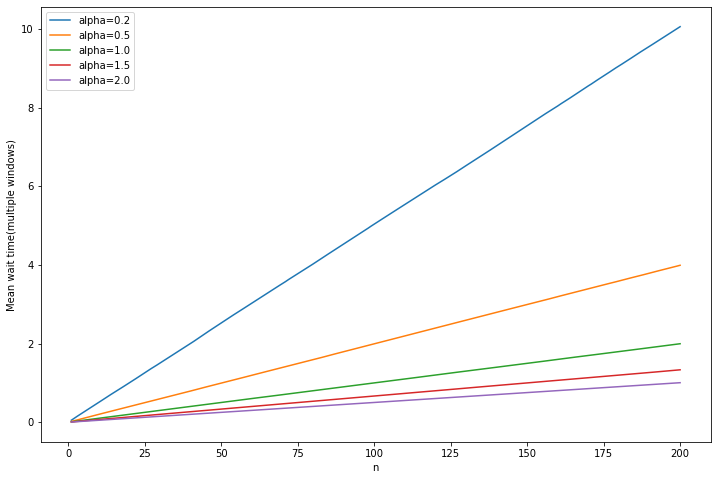

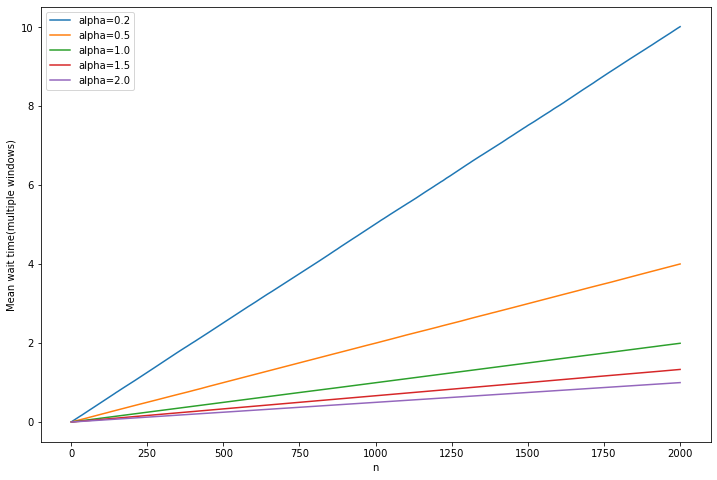

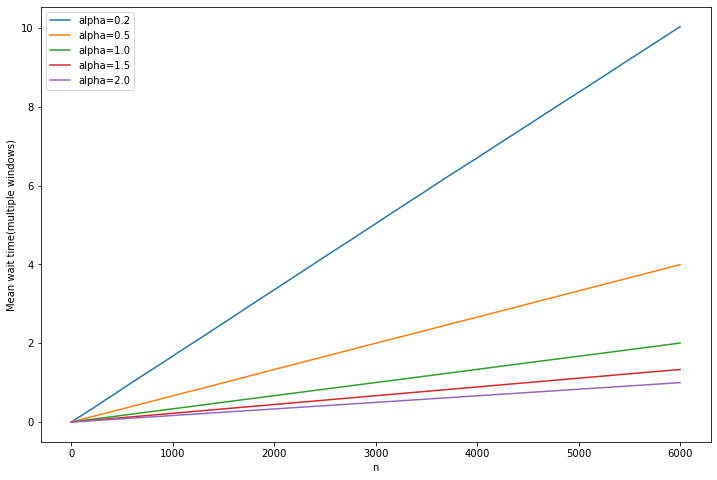

In [7]:
for size in SIZES:
    plt.figure(figsize=(12, 8))
    ns = [n for n in range(1, size * 2 + 1)]
    for alpha in ALPHAS:
        ys = simulate_multiple_windows(MAX_REPEATS // 10 // size, alpha, size)
        plt.plot(ns, ys, label='alpha={}'.format(alpha))
    plt.xlabel('n')
    plt.ylabel('Mean wait time(multiple windows)')
    plt.legend()
    plt.show()

Экспериментально получили, что время ожидания $k$-ого человека в очереди похоже на $\dfrac{k}{\alpha \cdot n}$.

Покажем разницу между этой оценкой и экспериментом.

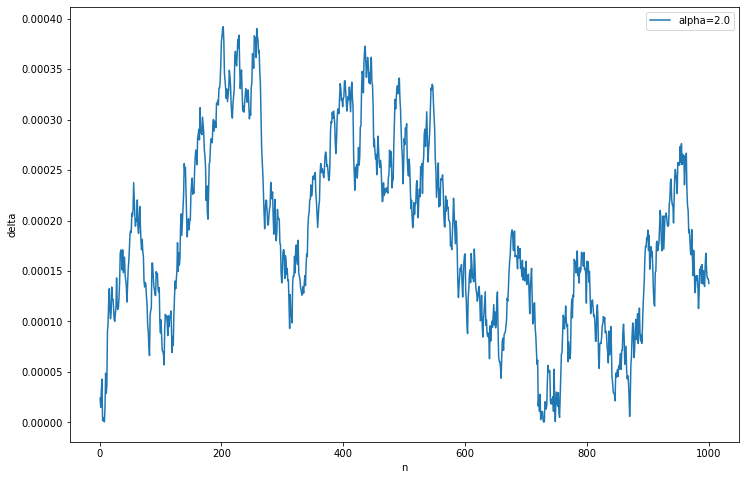

In [8]:
def show_delta_multiple_windows(n, alpha):
    plt.figure(figsize=(12, 8))
    ns = [n for n in range(1, n+1)]
    ys = simulate_multiple_windows(MAX_REPEATS // n, alpha, n)
    deltas = np.zeros(n)
    for k in range(n):
        deltas[k] = abs(ys[k] - (k + 1) / (alpha * n))
    plt.plot(ns, deltas, label='alpha={}'.format(alpha))
    plt.xlabel('n')
    plt.ylabel('delta')
    plt.legend()
    plt.show()
    
show_delta_multiple_windows(1000, 2.0)